# Spotify Songs 



## Investigation Overview
In this investigation, I wanted to look at the characteristics of songs that could be used to recommend a song to any user with any taste in music.

## Dataset Overview
Spotify is an audio streaming platform that that provides DRM-restricted music, videos and podcasts from record labels and media companies. It has over 50 million tracks which user can browse using various parameters like artist, album, genre, or via playlists.It pays the artists or the right holders via royalties which is approximately 70% of thier revenue. Thus, it is also a good platform for musicians to not only showcase their talent but also to make some money.

Data Source: <a href='https://rstudio-pubs-static.s3.amazonaws.com/594296_61801bd1dbd745b5b0dde95eb49dc60b.html'>https://rstudio-pubs-static.s3.amazonaws.com/594296_61801bd1dbd745b5b0dde95eb49dc60b.html</a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
Songs = pd.read_csv('Spotify_songs.csv');

In [3]:
##converting release data from string to datetime
Songs['track_album_release_date']= pd.to_datetime(Songs['track_album_release_date'])
 ##Checking
Songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32833 non-null  object        
 1   track_name                32828 non-null  object        
 2   track_artist              32828 non-null  object        
 3   track_popularity          32833 non-null  int64         
 4   track_album_id            32833 non-null  object        
 5   track_album_name          32828 non-null  object        
 6   track_album_release_date  32833 non-null  datetime64[ns]
 7   playlist_name             32833 non-null  object        
 8   playlist_id               32833 non-null  object        
 9   playlist_genre            32833 non-null  object        
 10  playlist_subgenre         32833 non-null  object        
 11  danceability              32833 non-null  float64       
 12  energy            

In [4]:
## removing unwanted columns
Songs.drop(['track_id', 'track_album_id','playlist_id','key','mode','valence'], axis='columns', 
           inplace=True)

In [5]:
##Convert duration time from ms to minutes
Songs['duration_ms']=Songs['duration_ms']/(60/(10**-3))
Songs.rename(columns={'duration_ms':'duration_mins'},inplace=True)
Songs.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_mins
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,122.036,3.245900
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,99.972,2.710000
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,124.008,2.943600
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,121.956,2.818217
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,123.976,3.150867


In [6]:
##drop null values 
Songs.isnull().sum()

track_name                  5
track_artist                5
track_popularity            0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
loudness                    0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
tempo                       0
duration_mins               0
dtype: int64

In [7]:
Songs.dropna(subset=['track_name', 'track_artist','track_album_name'], inplace=True)
##Check
Songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_name                32828 non-null  object        
 1   track_artist              32828 non-null  object        
 2   track_popularity          32828 non-null  int64         
 3   track_album_name          32828 non-null  object        
 4   track_album_release_date  32828 non-null  datetime64[ns]
 5   playlist_name             32828 non-null  object        
 6   playlist_genre            32828 non-null  object        
 7   playlist_subgenre         32828 non-null  object        
 8   danceability              32828 non-null  float64       
 9   energy                    32828 non-null  float64       
 10  loudness                  32828 non-null  float64       
 11  speechiness               32828 non-null  float64       
 12  acousticness      

## Univariate Exploration

> investigate distributions of individual variables. 
> I'll start by looking at the distribution of the liveness


## The distribution of liveness

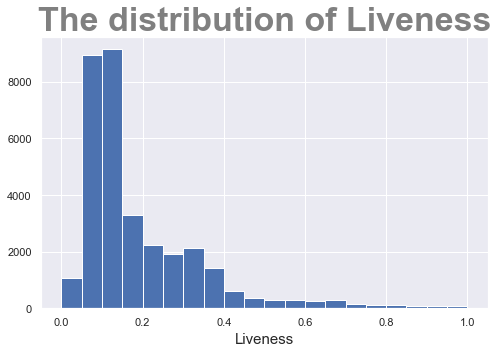

In [8]:
# start with a standard-scaled plot
sb.set()
binsize = 0.05
bins = np.arange(0, Songs['liveness'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Songs, x = 'liveness', bins = bins)
plt.xlabel('Liveness',fontsize='15')
plt.title("The distribution of Liveness",fontsize=34,weight='bold',color='grey');
plt.show()

The liveness of a song is a parameter that detects the presence of an audience in the recording, from the graph we can see that it varies from (0 "lowest" to 1 "highest" ).The most songs has a liveness rate of about 0.1

## The most occurrence genres

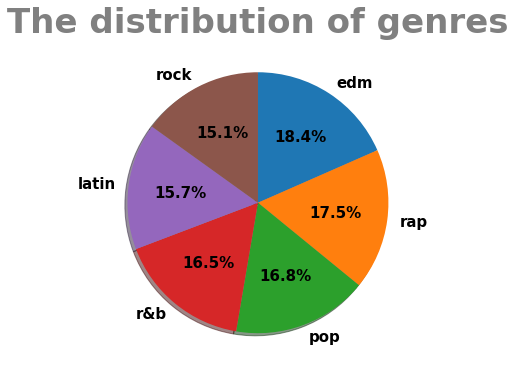

In [9]:
sb.reset_orig()
sorted_counts = Songs['playlist_genre'].value_counts()
plt.figure(figsize=[6, 6])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,
        autopct='%1.1f%%',textprops={'color':"black",'fontsize':"15",'weight':"bold"},shadow=True);
plt.title("The distribution of genres",fontsize=34,weight='bold',color='grey');

Edm and rap songs have the most occurrence.

## The distribution of each subgenre in each genre.

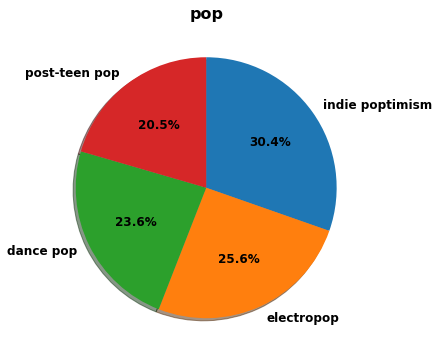

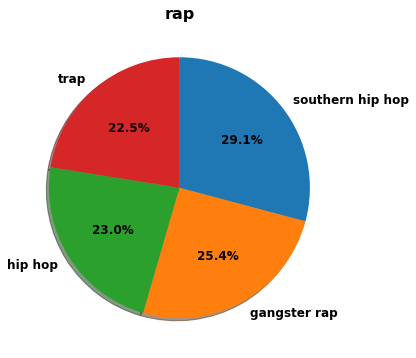

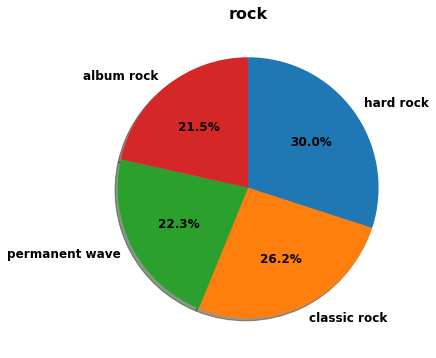

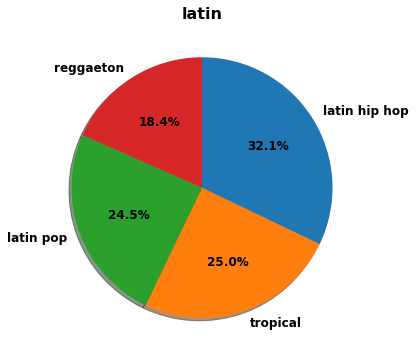

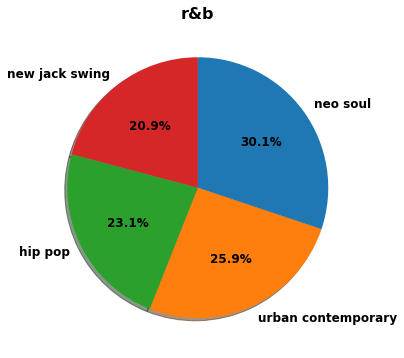

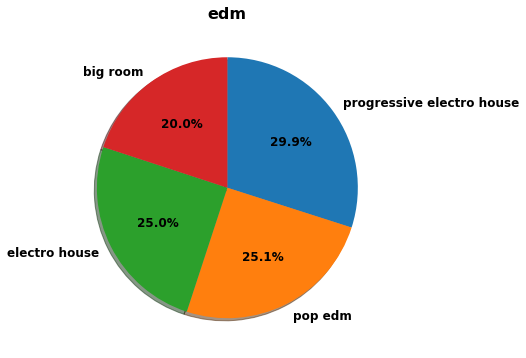

In [10]:
sb.reset_orig()
for genre in Songs.playlist_genre.unique():
    sorted_counts =Songs.groupby('playlist_genre').playlist_subgenre.value_counts()[genre]
    plt.figure(figsize=[6, 6])
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,
        autopct='%1.1f%%',textprops={'fontsize':"12",'weight':'bold'},shadow=True);
    plt.title(genre,fontsize="16",weight="bold")


## Do all songs have the same duration ?

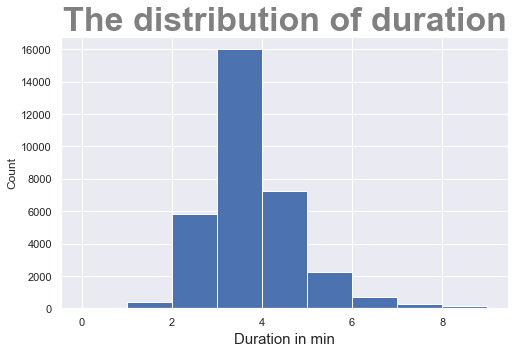

In [11]:
# start with a standard-scaled plot
sb.set()
binsize = 1
bins = np.arange(0, Songs['duration_mins'].max()+binsize, binsize)
sb.set()
plt.figure(figsize=[8, 5])
plt.hist(data = Songs, x = 'duration_mins', bins = bins)
plt.xlabel('Duration in min',fontsize='15')
plt.ylabel("Count")
plt.title("The distribution of duration",fontsize=34,weight='bold',color='grey');
plt.show()

 The duration of songs varies between 1 min to abour 9 mins, but in most of the songs , the duration is about 3.5 mins


## The distribution of danceability of songs

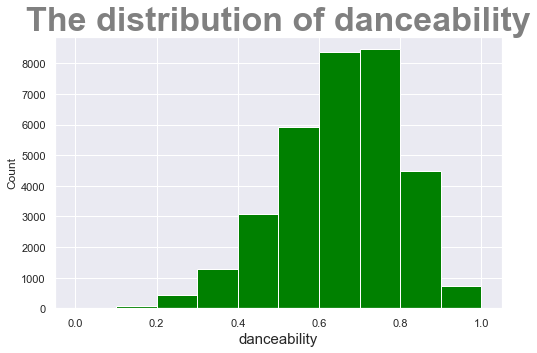

In [12]:
# start with a standard-scaled plot

binsize = 0.1
bins = np.arange(0, Songs['danceability'].max()+binsize, binsize)
sb.set()
plt.figure(figsize=[8, 5])
plt.hist(data = Songs, x = 'danceability', bins = bins,color='green')
plt.xlabel('danceability',fontsize='15')
plt.ylabel("Count")
plt.title("The distribution of danceability",fontsize=34,weight='bold',color='grey');
plt.show()

From the above graph, we can see that the danceability of songs is a variable that falls between 0 and 1 , In most songs it varies between 0.6 and 0.8


## The distribution of Energy

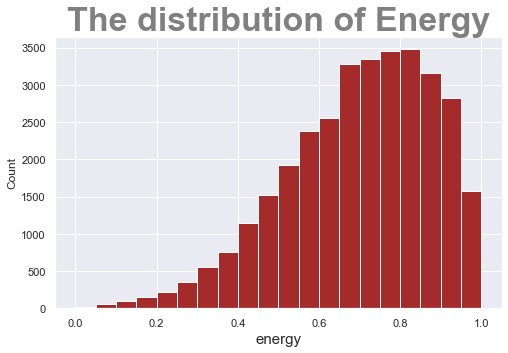

In [13]:
# start with a standard-scaled plot

binsize =0.05
bins = np.arange(0, Songs['energy'].max()+binsize, binsize)
sb.set()
plt.figure(figsize=[8, 5])
plt.hist(data = Songs, x = 'energy', bins = bins,color='brown')
plt.xlabel('energy',fontsize='15')
plt.ylabel("Count")
plt.title("The distribution of Energy",fontsize=34,weight='bold',color='grey');

plt.show()

From the above graph, we can see that the danceability of songs is a variable that falls between 0 and 1 , In most songs it varies between 0.6 and 0.9 and there are no unusual values

In [14]:
numeric_vars = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'duration_mins', 'liveness']
categoric_vars = ['playlist_genre', 'playlist_subgenre', 'track_artist']

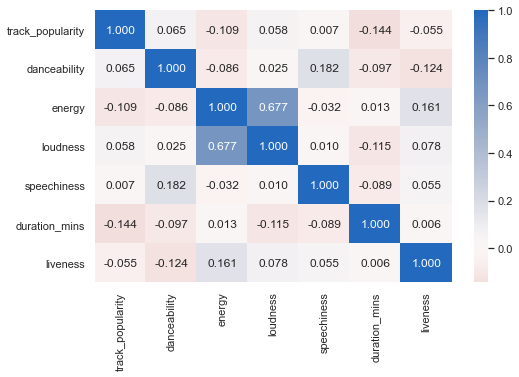

In [15]:
# correlation plot
sb.set()
plt.figure(figsize = [8, 5])
sb.heatmap(Songs[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

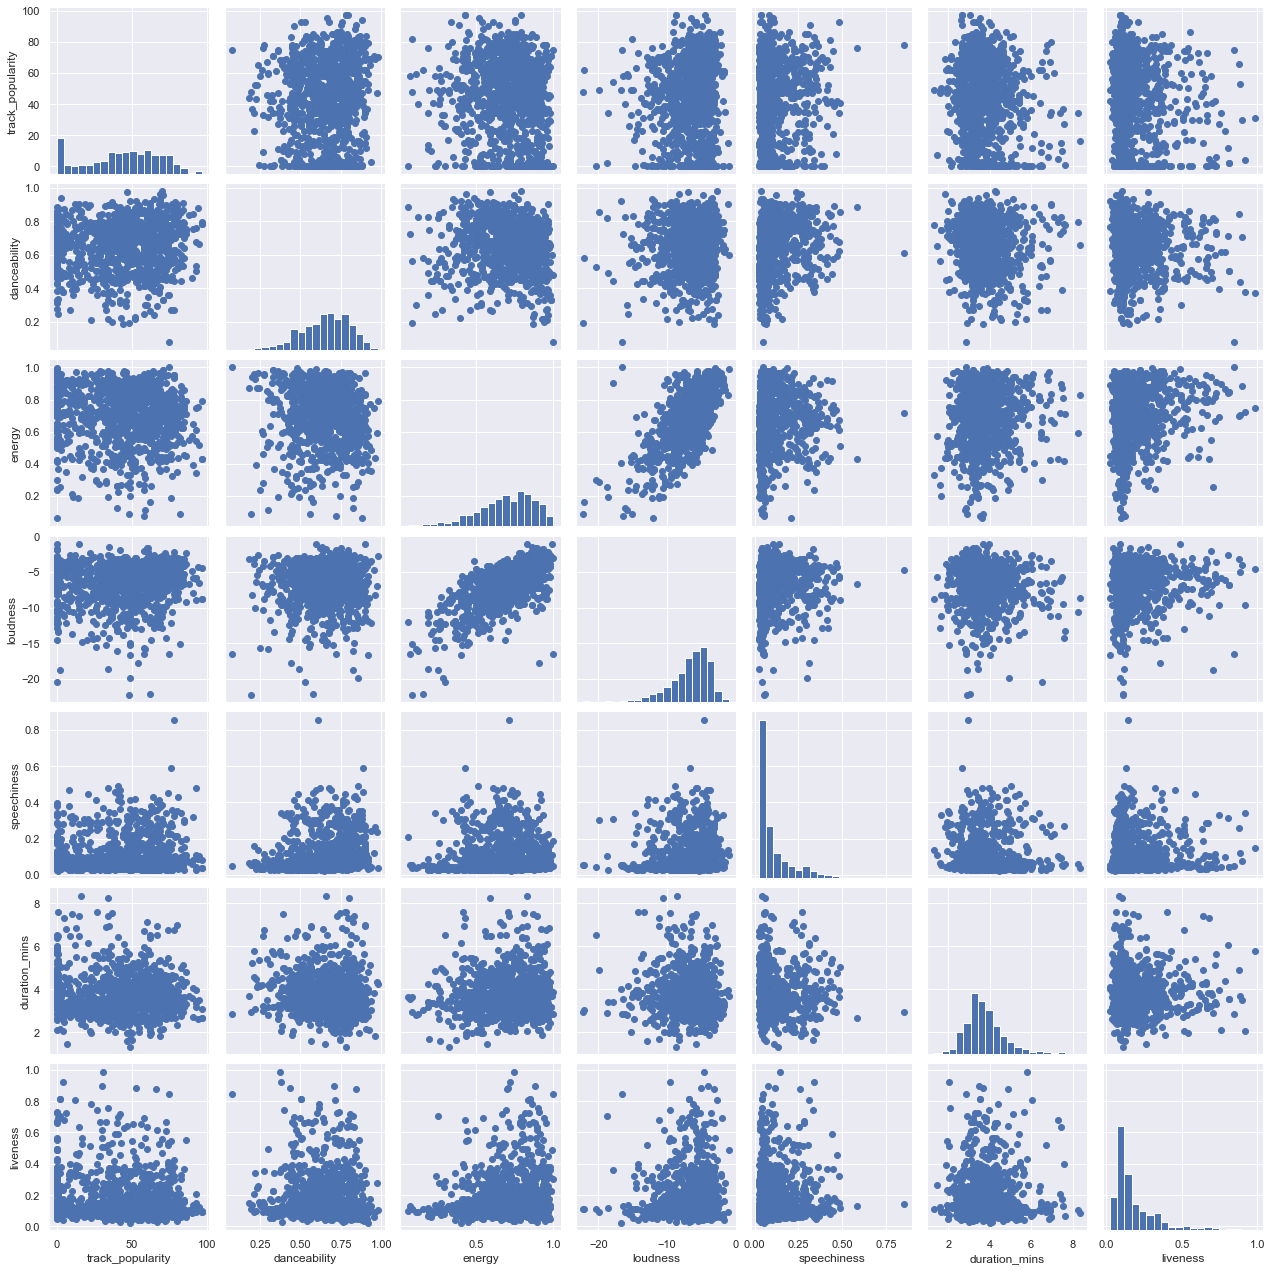

In [16]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(Songs.shape[0], 1000, replace = False)
songs_samp = Songs.loc[samples,:]
sb.set(palette='deep')
g = sb.PairGrid(data = songs_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As it's logically expected, the lodness is positive correlated with energy (When the loudness of a song increases the energy of provided by it is ,indeed, increased)


## The Relation between loudness and energy more closely


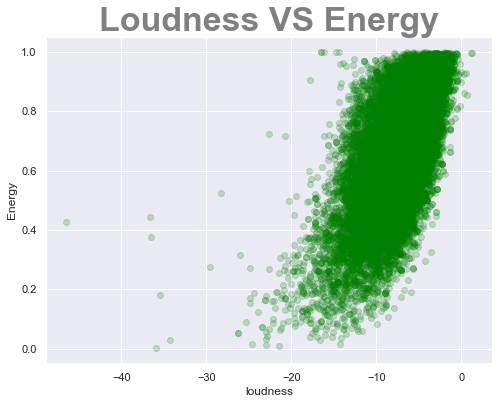

In [17]:
plt.figure(figsize = [8, 6])
plt.scatter(data = Songs, x = 'loudness', y = 'energy',alpha=0.2,color='green')
plt.xlabel('loudness')
plt.ylabel('Energy')

plt.title("Loudness VS Energy",fontsize=34,weight='bold',color='grey');
plt.show()

## The most popular genres of songs

In [18]:
# Create function to get the most dark colors from color palette depending on parameters
def get_dark_colors(number_of_degrees, step, palette, last_num):
    color_palette = sb.color_palette(palette, number_of_degrees)
    last_nums = np.arange(0, number_of_degrees, step)[-last_num:]
    color_list = []
    for n, color in enumerate(color_palette):
        if n in last_nums:
            color_list.append(color)
    return color_list

In [19]:
#Group by carrier codes and get sum of delayes for each carrier
genre_ordered=Songs.groupby('playlist_genre').track_popularity.mean().sort_values(ascending=False)


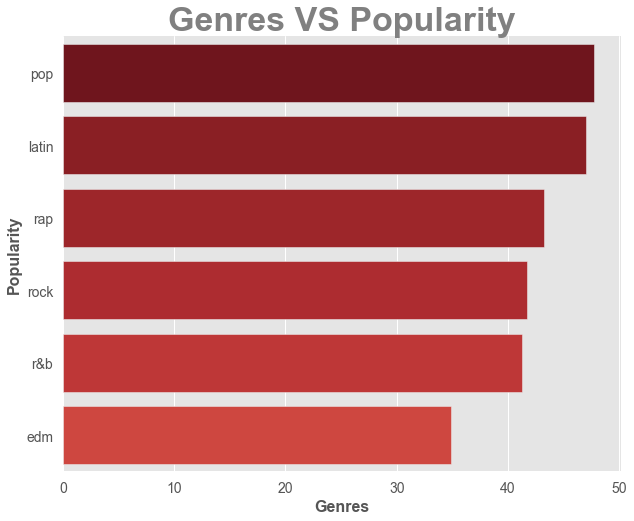

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
# Get the most '10' dark 'red' degrees out of '101' degree and '6' degree between each one
dark_reds = get_dark_colors(101, 6, 'Reds', 10)
dark_reds.reverse() # reverse it
sb.barplot(x=genre_ordered.values,y=genre_ordered.index,color='#008080',palette=dark_reds)
sb.despine(left=True, bottom=True) # Remove plot borders
plt.xlabel("Genres",fontsize=16,weight='bold')
plt.ylabel("Popularity",fontsize=16,weight='bold')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Genres VS Popularity",fontsize=34,weight='bold',color='grey');


As shown above, The most popular songs are Pop, Latin and Rap songs 
, The least popular songs are edm and r&b songs

## In general, have the duration of songs decreased over time ?

In [21]:
##first, we wnat to get a column of the years only 
Songs["year"] = Songs['track_album_release_date'].map(lambda x: x.year)


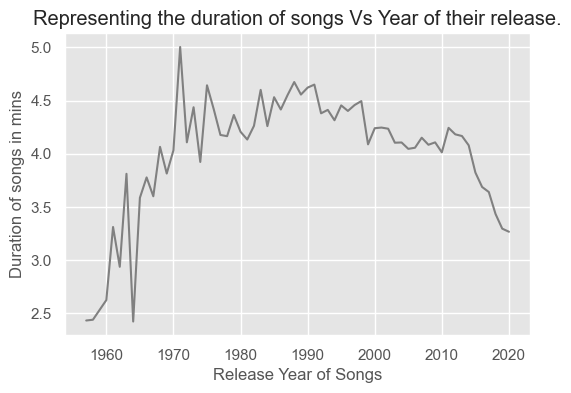

In [22]:

#we want to know the vote_count of movies for every year therefore we have to sum up all the movies of a particular year

duration_year = Songs.groupby('year')['duration_mins'].mean()

#figure size(width, height)
plt.figure(dpi =100)

#x-axis
plt.xlabel('Release Year of Songs', fontsize = 12)
#y-axis
plt.ylabel('Duration of songs in mins', fontsize = 12)
#title
plt.title('Representing the duration of songs Vs Year of their release.')

#plotting the graph
plt.plot(duration_year,color='grey')

#displaying the line plot
plt.show()

From the graph above, the duration of songs was increasing during the period of (1960 - 1990) till it reached about 5 mins or more and after this period till now, the duration of song is decreasing to be about 3 - 3.5 mins

##  The most popular artists from 2019 : 2020


In [23]:

df_new=Songs[Songs['year']>=2019 ].copy()
artists=df_new.track_artist.unique()
popularity=[]
for artist in artists:
    popularity.append(df_new[df_new['track_artist']==artist].track_popularity.mean())
popularity=np.array(popularity)

In [24]:
popular_artists = pd.DataFrame({'track_artist':artists , 'track_popularity': popularity})

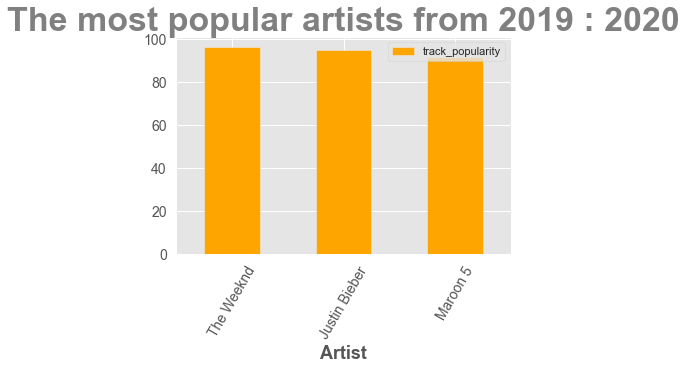

In [25]:
popular_artists.sort_values('track_popularity',ascending=False).nlargest(3, 'track_popularity').plot.bar(x='track_artist', y='track_popularity',color='orange',fontsize=14);
plt.xlabel("Artist", fontsize=18,weight='bold');
plt.xticks(rotation='60');
plt.title("The most popular artists from 2019 : 2020",fontsize=34,weight='bold',color='grey');


The most popular singers/bands nowadays are "The Weeknd, Justin Bieber, Maroon5"

## The most popular songs in 2018-2020

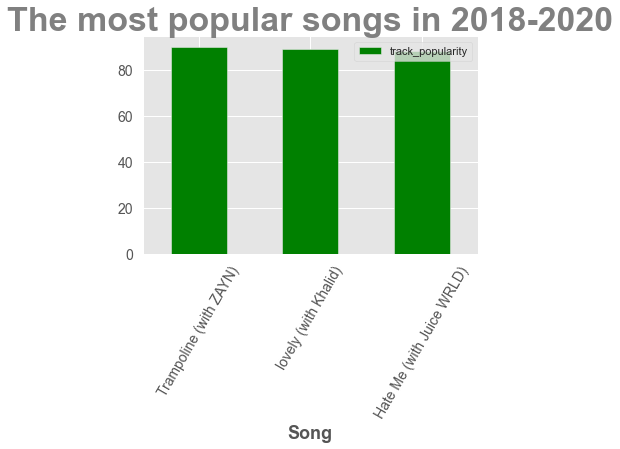

In [26]:
df_song=Songs[Songs['year']>=2018 ].copy()
df_song.drop_duplicates(subset ="track_name", 
                     keep = False, inplace = True) 
df_song.nlargest(3, 'track_popularity').sort_values('track_popularity',ascending=False).plot.bar(x='track_name', y='track_popularity',color='green',fontsize=14);
plt.xticks(rotation='60');
plt.xlabel("Song", fontsize=18,weight='bold');
plt.title("The most popular songs in 2018-2020",fontsize=34,weight='bold',color='grey');


As shown from the above bar plot, the most popular songs in the period from (2018-2020) are : Trampolin, Lovely , Hate Me

## The most popular song of Billie Eilish's album "WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?" 

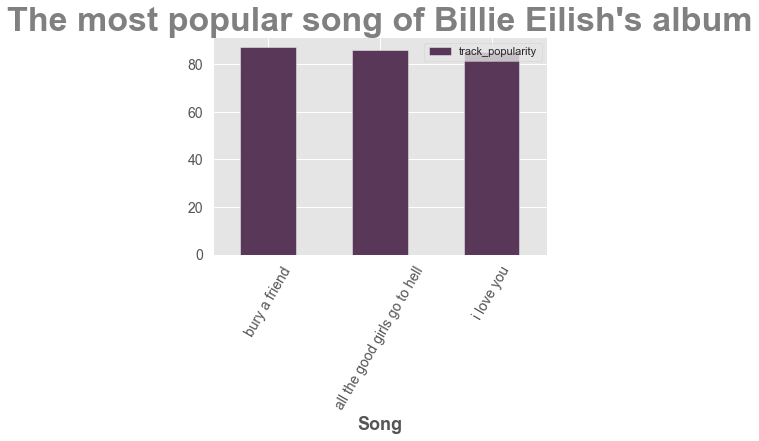

In [27]:
Billie_Eilish=Songs[Songs['track_artist']=='Billie Eilish'].copy()
album=Billie_Eilish[Billie_Eilish['track_album_name']=="WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?"].copy()
album.drop_duplicates(subset ="track_name", 
                     keep = False, inplace = True) 
album.nlargest(3, 'track_popularity').sort_values('track_popularity',ascending=False).plot.bar(x='track_name', y='track_popularity',color='#583759',fontsize=14);
plt.xticks(rotation='60');
plt.title("The most popular song of Billie Eilish's album",fontsize=34,weight='bold',color='grey');
plt.xlabel("Song", fontsize=18,weight='bold');


My favourite singer is Billie Eilish, and thus, I was very interested in exploring her songs, From the above bar plot, The most popular songs from her latest album "WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?" are: bury a friend, all the good girls go to hell, I love you

## Which genres gives the most energy?


In [28]:
#Group by carrier codes and get sum of delayes for each carrier
genre_ordered=Songs.groupby('playlist_genre').energy.mean().sort_values(ascending=False)

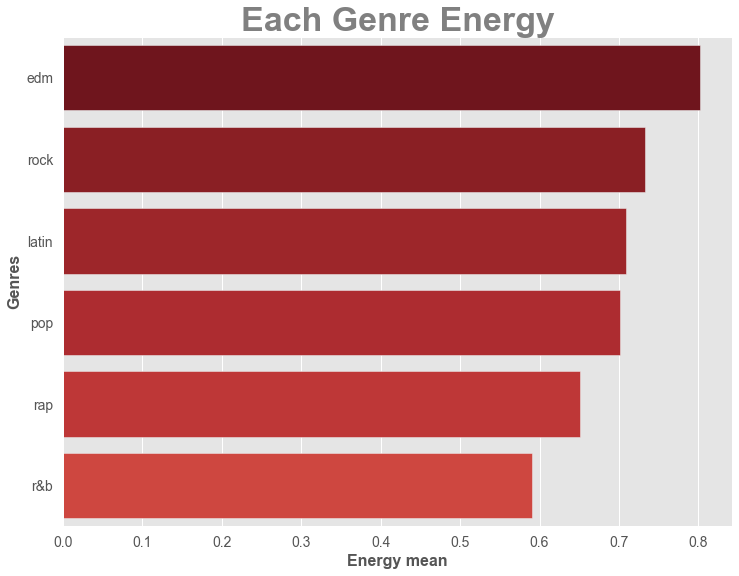

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(12,9))
sb.barplot(x=genre_ordered.values,y=genre_ordered.index,palette=dark_reds)
plt.ylabel("Genres",fontsize=16,weight='bold')
plt.xlabel("Energy mean",fontsize=16,weight='bold')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Each Genre Energy",fontsize=34,weight='bold',color='grey');

> This is kinda not very expected for me, as I expected the rap songs to be one of the top 3

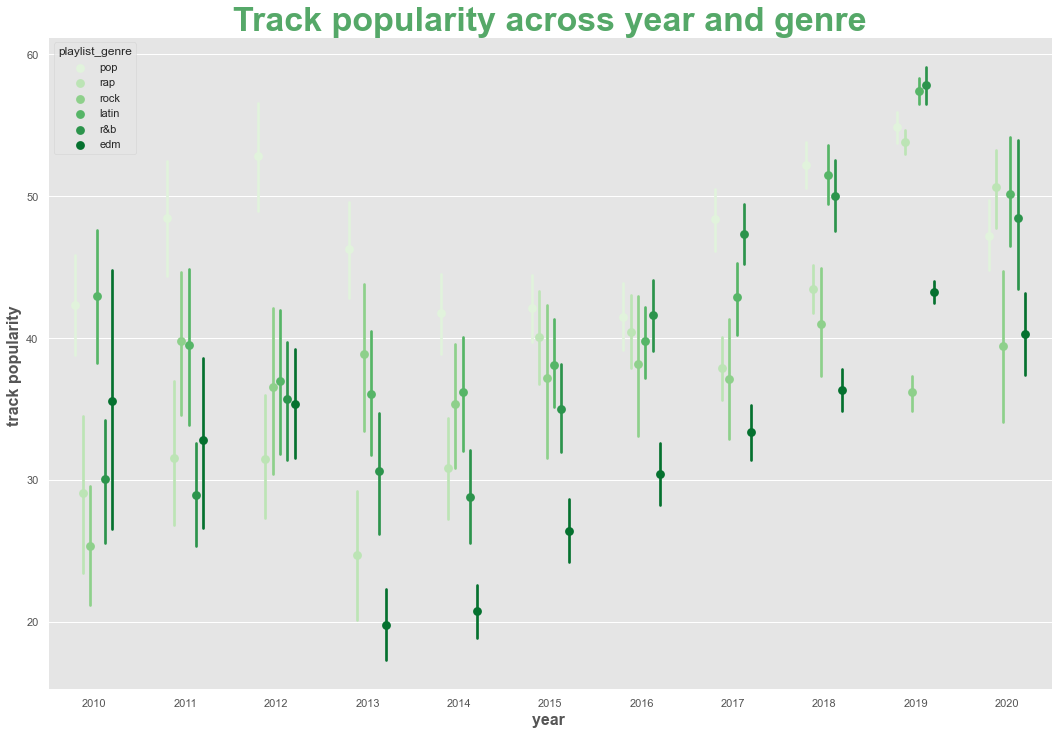

In [30]:
fig = plt.figure(figsize = [18,12])
recent_songs=Songs[Songs['year']>=2010]
ax = sb.pointplot(data = recent_songs, x = 'year', y = 'track_popularity', hue = 'playlist_genre',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Track popularity across year and genre',fontsize=34,weight='bold',color='g')
plt.ylabel('track popularity ',fontsize=16,weight='bold')
plt.xlabel('year ',fontsize=16,weight='bold')
ax.set_yticklabels([],minor = True)
##plt.tight_layout() # Improve appearance
plt.show();


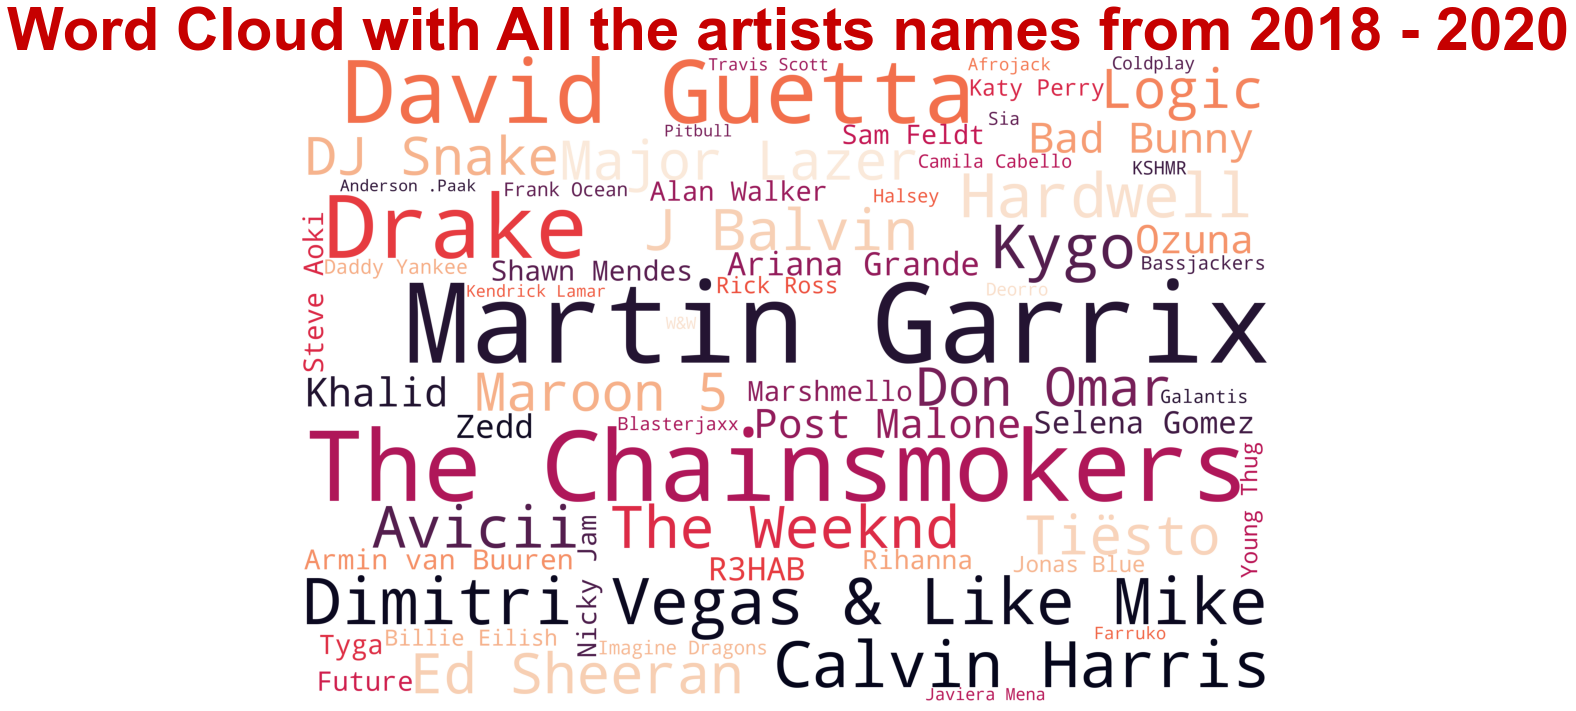

In [37]:
# Get type frequencies
tracks_artists = recent_songs.track_artist.value_counts()

from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud

# Get the most '12' dark 'red' degrees out of '100' degree and '7' degree between each one
dard_reds = get_dark_colors(100, 7, 'Reds', 12)
dard_reds = LinearSegmentedColormap.from_list('mycmap', dard_reds) # Create custome colormap

# Create word cloud object
wordcloud2 = WordCloud(width = 3000,
                       height = 2000,
                       background_color ='white',
                       random_state=1,
                       collocations=False,
                       min_font_size=50,
                       colormap='rocket').generate_from_frequencies(tracks_artists)

plt.figure(figsize=(20,20)) # Set figsize
plt.imshow(wordcloud2) # Plot the word cloud
plt.axis("off") # Remove axis

plt.title('Word Cloud with All the artists names from 2018 - 2020',fontsize=60, weight='bold', color = '#c60000') # Set title
plt.tight_layout() # Improve appearance



The Chainsmokers, shawn Mendes, Ariana GrandeMaroon 5, Ed sheeran and more are very popular singers/bands </li>
    



# Resources
<ul><li>
<a href='https://github.com/madesouky/Crimes-in-Chicago/blob/main/03_Slideshow.ipynb'>https://github.com/madesouky/Crimes-in-Chicago/blob/main/03_Slideshow.ipynb</a></li>
<li><a href='https://seaborn.pydata.org/generated/seaborn.barplot.html'> https://seaborn.pydata.org/generated/seaborn.barplot.html</a></li>
<li><a href='https://seaborn.pydata.org/generated/seaborn.lineplot.html'>https://seaborn.pydata.org/generated/seaborn.lineplot.html</a></li>
